# 📌 Previsão de Cancelamento de Reservas em Hotéis
**Objetivo:** Desenvolver um modelo de Machine Learning para prever o cancelamento de reservas.

**Modelo Utilizado:**
- Regressão Logística    



In [ ]:

# 📌 1. Importação das Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:

# 📌 2. Carregamento dos Dados
df = pd.read_csv("hotel_bookings.csv")

# Visualização das primeiras linhas
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

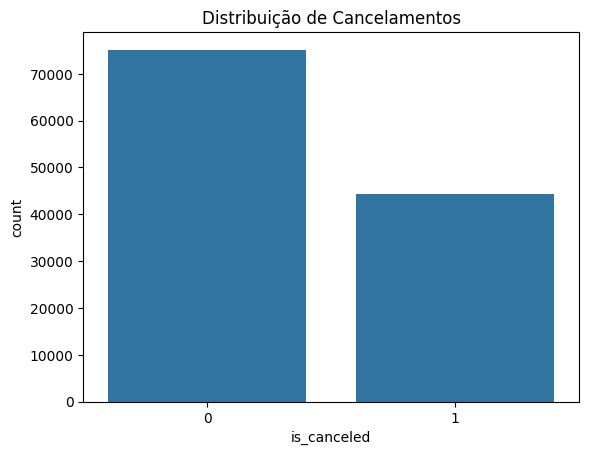

In [ ]:

# 📌 3. Análise Exploratória dos Dados
# Verificando valores nulos
print(df.isnull().sum())

# Estatísticas básicas
print(df.describe())

# Distribuição de cancelamentos
sns.countplot(x='is_canceled', data=df)
plt.title("Distribuição de Cancelamentos")
plt.show()


In [ ]:

# 📌 4. Pré-processamento dos Dados

# Removendo colunas irrelevantes
df = df.drop(["reservation_status", "reservation_status_date"], axis=1)

# Preenchendo valores nulos com a mediana apenas para colunas numéricas
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)

# Convertendo variáveis categóricas em numéricas
df = pd.get_dummies(df, drop_first=True)

# Normalizando os dados
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df.drop("is_canceled", axis=1)), columns=df.drop("is_canceled", axis=1).columns)

# Adicionando a variável alvo
X_scaled["is_canceled"] = df["is_canceled"]

# Separando features e target
X = X_scaled.drop("is_canceled", axis=1)
y = X_scaled["is_canceled"]

# Divisão em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# 📌 5. Treinamento do Modelo

# 🔹 Regressão Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


In [ ]:

# 📌 6. Avaliação do Modelo

def avaliar_modelo(nome, y_test, y_pred):
    print(f"📌 Modelo: {nome}")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
    print("-" * 50)

avaliar_modelo("Regressão Logística", y_test, y_pred_logreg)



📌 Modelo: Regressão Logística
Acurácia: 0.8197503978557669
Matriz de Confusão:
 [[13567  1340]
 [ 2964  6007]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     14907
           1       0.82      0.67      0.74      8971

    accuracy                           0.82     23878
   macro avg       0.82      0.79      0.80     23878
weighted avg       0.82      0.82      0.82     23878

--------------------------------------------------


In [ ]:

# 📌 7. Seleção de Features Importantes

importances = abs(logreg.coef_[0])
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df.head(10))  # Exibe as 10 features mais importantes


                            Feature  Importance
17      required_car_parking_spaces    5.500421
10           previous_cancellations    1.843732
242         deposit_type_Non Refund    1.489298
216        market_segment_Online TA    0.768348
18        total_of_special_requests    0.615008
0                         lead_time    0.598543
11   previous_bookings_not_canceled    0.564112
233            assigned_room_type_D    0.550663
234            assigned_room_type_E    0.503701
236            assigned_room_type_G    0.492128


In [ ]:

# 📌 8. Ajuste do Modelo

# Ajuste de hiperparâmetros na Regressão Logística
logreg_tuned = LogisticRegression(C=0.5, max_iter=200)
logreg_tuned.fit(X_train, y_train)
y_pred_logreg_tuned = logreg_tuned.predict(X_test)

avaliar_modelo("Regressão Logística Ajustada", y_test, y_pred_logreg_tuned)


📌 Modelo: Regressão Logística Ajustada
Acurácia: 0.820001675182176
Matriz de Confusão:
 [[13571  1336]
 [ 2962  6009]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     14907
           1       0.82      0.67      0.74      8971

    accuracy                           0.82     23878
   macro avg       0.82      0.79      0.80     23878
weighted avg       0.82      0.82      0.82     23878

--------------------------------------------------


## Conclusão

O modelo de **Regressão Logística Ajustada** aplicado para a previsão de cancelamento de reservas obteve uma **acurácia de 82%**, o que indica um desempenho razoável. A análise detalhada da matriz de confusão e das métricas por classe revelou que:

- **Classe 0 (Reservas não canceladas):**
  - Apresenta um alto recall (91%), indicando que a maioria das reservas não canceladas foram corretamente identificadas.
  - A precisão também é satisfatória, resultando em um bom equilíbrio entre as métricas.

- **Classe 1 (Reservas canceladas):**
  - O recall de 67% mostra que o modelo não identificou todos os casos de cancelamento, implicando um número considerável de falsos negativos.
  - Apesar de a precisão ser equivalente à da classe 0 (82%), a menor sensibilidade para a classe 1 sugere a necessidade de ajustes caso a detecção dos cancelamentos seja crítica para o negócio.

Em resumo, embora o desempenho geral seja aceitável, recomenda-se explorar melhorias como o ajuste do threshold de decisão, técnicas de balanceamento de dados ou a aplicação de modelos mais robustos para otimizar a detecção das reservas que podem ser canceladas.
